# Tohoku Notebook

## Setup Environment

We assume you have installed `anuga` in your `python` environment. 

### Setup inline graphics and animation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

## Tohoku Folder

Change into the Tohoku folder (if you have not done that already)

In [2]:
print(f'Current directory {os.getcwd()}')
try:
    os.chdir('Tohoku')
except:
    pass


Current directory /home/steve/Tohoku


## Create Domain

In [3]:
import anuga


# Create domain
dx = dy = 500
L = 80000
W = 80000


# Create topography
def topography(x, y):
    el = -1000
    return el


domain = anuga.rectangular_cross_domain(int(L/dx), int(W/dy), len1=L, len2=W)

domain.set_name('test')
domain.set_quantity('elevation', function=topography, location='centroids')

## Apply Okada to Stage

Figure files for each frame will be stored in _plot
4.675774912624097 -1.9391794929137773
-1000.0 -1000.0
1004.6757749126241 998.0608205070862


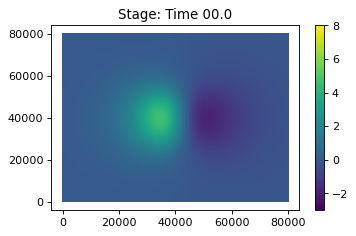

In [4]:
#from anuga.tsunami_source.okada_tsunami import earthquake_source

x0 = 40000.0
y0 = 40000.0
depth = 15000.0
strike = 0.0
dip = 15.0
length = 20000.0
width = 6000.0
slip = 60.0
rake = 90.0
opening = 0.0
nu = 0.25


# Run one instance of the okada KL field as defined by the choice of iseed
#import okada_kl_subfaults as okl
import okada

x = domain.centroid_coordinates[:,0]
y = domain.centroid_coordinates[:,1]

uE,uN,uZ = okada.forward(x,y, xoff=x0, yoff=y0, 
                   depth=depth, length=length, width=width,
                   slip=slip, opening=opening,
                   strike=strike, dip=dip, rake=rake,
                   nu=nu)

    
# The default argument values are appropriate for the Tohoku earth quake
#uE,uN,uZ,slips = okl.deformation(x, y, xoff=300000.0, yoff=250000.0, E_subfault=5, N_subfault=10, iseed=1001)

Stage = domain.quantities['stage'].centroid_values
Stage[:] = Stage + uZ


dplotter = anuga.Domain_plotter(domain)

print (np.max(dplotter.stage), np.min(dplotter.stage))
print (np.max(dplotter.elev), np.min(dplotter.elev))
print (np.max(dplotter.depth), np.min(dplotter.depth))

dplotter.plot_stage_frame(vmin=-3.0, vmax=8.0)

In [5]:
Br = anuga.Reflective_boundary(domain)
# Boundary conditions
domain.set_boundary({'left': Br,
                         'bottom': Br,
                         'right': Br,
                         'top': Br})

In [6]:
import time
t0 = time.time()
min = 60
hour = 3600

# Initial run without any event
for t in domain.evolve(yieldstep=0.25*min, finaltime=0.125*hour):
    dplotter.save_stage_frame(vmin=-3.0,vmax=8.0)

    domain.print_timestepping_statistics()

print ('That took %.2f seconds' %(time.time()-t0))


Time = 0.0000 (sec), steps=0 (10s)
Time = 15.0000 (sec), delta t in [0.75570252, 0.75584938] (s), steps=20 (1s)
Time = 30.0000 (sec), delta t in [0.75538037, 0.75569164] (s), steps=20 (1s)
Time = 45.0000 (sec), delta t in [0.75510091, 0.75536666] (s), steps=20 (1s)
Time = 60.0000 (sec), delta t in [0.75495421, 0.75509205] (s), steps=20 (1s)
Time = 75.0000 (sec), delta t in [0.75492883, 0.75494972] (s), steps=20 (1s)
Time = 90.0000 (sec), delta t in [0.75493525, 0.75500245] (s), steps=20 (1s)
Time = 105.0000 (sec), delta t in [0.75500581, 0.75510488] (s), steps=20 (1s)
Time = 120.0000 (sec), delta t in [0.75510913, 0.75520572] (s), steps=20 (1s)
Time = 135.0000 (sec), delta t in [0.75521029, 0.75529431] (s), steps=20 (1s)
Time = 150.0000 (sec), delta t in [0.75529894, 0.75536698] (s), steps=20 (1s)
Time = 165.0000 (sec), delta t in [0.75536936, 0.75542664] (s), steps=20 (1s)
Time = 180.0000 (sec), delta t in [0.75542920, 0.75548028] (s), steps=20 (1s)
Time = 195.0000 (sec), delta t in [

In [7]:
dplotter.make_stage_animation()